<a href="https://colab.research.google.com/github/venkshr/automation/blob/main/Data_Story_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statistics
import plotly.express as px

In [2]:
from google.colab import files
data_load=files.upload()

Saving savings_data_final.csv to savings_data_final.csv


In [3]:
df=pd.read_csv("savings_data_final.csv")
fig=px.scatter(df,y="quant_saved",color="rem_any")
fig.show()

In [4]:
import csv
with open ("savings_data_final.csv",newline="") as f:
  reader=csv.reader(f)
  savings_data=list(reader)
savings_data.pop(0)
total_entries=len(savings_data)
total_people_given_reminder=0
for data in savings_data:
  if int(data[3])==1:
    total_people_given_reminder+=1
import plotly.graph_objects as go
fig=go.Figure(go.Bar(x=["reminded","not reminded"],y=[total_people_given_reminder,(total_entries-total_people_given_reminder)]))
fig.show()

In [5]:
all_savings=[]
for data in savings_data:
  all_savings.append(float(data[0]))
print(f"mean of savings-{statistics.mean(all_savings)}")
print(f"median of savings-{statistics.median(all_savings)}")
print(f"mode of savings-{statistics.mode(all_savings)}")

mean of savings-85.32780331328739
median of savings-39.2724
mode of savings-0.0


In [6]:
reminded_savings=[]
not_reminded_savings=[]
for data in savings_data:
  if int(data[3])==1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))
print("result for people who were reminded to save")
print(f"mean of savings={statistics.mean(reminded_savings)}")
print(f"median of savings={statistics.median(reminded_savings)}")
print(f"mode of savings={statistics.mode(reminded_savings)}")
print("result for people who were not reminded to save")
print(f"mean of savings={statistics.mean(not_reminded_savings)}")
print(f"median of savings={statistics.median(not_reminded_savings)}")
print(f"mode of savings={statistics.mode(not_reminded_savings)}")

result for people who were reminded to save
mean of savings=82.56940908263547
median of savings=39.2724
mode of savings=0.0
result for people who were not reminded to save
mean of savings=89.67095185226523
median of savings=36.0475
mode of savings=0.0


In [7]:
print(f"standard deviation of all the data={statistics.stdev(all_savings)}")
print(f"standard deviation of people who were reminded={statistics.stdev(reminded_savings)}")
print(f"standard deviation of people who were not reminded={statistics.stdev(not_reminded_savings)}")

standard deviation of all the data=196.75453011909315
standard deviation of people who were reminded=173.24866414440817
standard deviation of people who were not reminded=228.875050299707


In [8]:
import numpy as np
age=[]
savings=[]
for data in savings_data:
  if float(data[5])!=0:
    age.append(float(data[5]))
    savings.append(float(data[0]))
correlation=np.corrcoef(age,savings)
print(f"correlation between the age of the person and their savings is equals{correlation[0,1]}")

correlation between the age of the person and their savings is equals0.03663447975985462


In [9]:
import plotly.figure_factory as ff
fig=ff.create_distplot([df["quant_saved"].tolist()],["savings"],show_hist=False)
fig.show()

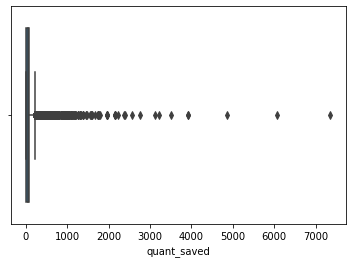

In [10]:
import seaborn as sns
sns.boxplot(data=df,x=df["quant_saved"])

In [11]:
q1=df["quant_saved"].quantile(0.25)
q3=df["quant_saved"].quantile(0.75)
iqr=q3-q1
print(f"q1-{q1}")
print(f"q3-{q3}")
print(f"iqr-{iqr}")
lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
print(f"lower_whisker-{lower_whisker}")
print(f"upper_whisker-{upper_whisker}")
new_df=df[df["quant_saved"]<upper_whisker]

q1-2.2840000000000003
q3-86.514
iqr-84.22999999999999
lower_whisker--124.06099999999998
upper_whisker-212.85899999999998


In [12]:
all_savings=new_df["quant_saved"].tolist()
print(f"mean of savings-{statistics.mean(all_savings)}")
print(f"median of savings-{statistics.median(all_savings)}")
print(f"mode of savings-{statistics.mode(all_savings)}")
print(f"standard deviation of savings-{statistics.stdev(all_savings)}")
fig=ff.create_distplot([new_df["quant_saved"].tolist()],["savings"],show_hist=False)
fig.show()

mean of savings-46.200519389818794
median of savings-36.0475
mode of savings-0.0
standard deviation of savings-50.866871917288634


In [13]:
import random
sampling_mean_list=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))
mean_sampling=statistics.mean(sampling_mean_list)
fig=ff.create_distplot([sampling_mean_list],["savings(sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling],y=[0,0.1],mode="lines",name="mean"))
fig.show()

In [14]:
print(f"standard deviation of sampling data-{statistics.stdev(sampling_mean_list)}")

standard deviation of sampling data-5.063167936762067


In [15]:
print(f"mean of population-{statistics.mean(all_savings)}")
print(f"mean of sampling distribution-{mean_sampling}")

mean of population-46.200519389818794
mean of sampling distribution-46.27784065406789


In [16]:
temp_df=new_df[new_df.age!=0]
age=temp_df["age"].tolist()
savings=temp_df["quant_saved"].tolist()
correlation=np.corrcoef(age,savings)
print(f"correlation between age and their savings is-{correlation[0,1]}")

correlation between age and their savings is-0.08561544120342093


In [17]:
reminded_df=new_df.loc[new_df["rem_any"]==1]
not_reminded_df=new_df.loc[new_df["rem_any"]==0]
print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [18]:
fig=ff.create_distplot([not_reminded_df["quant_saved"].tolist()],["savings(not_reminded)"],show_hist=False)
fig.show()

In [19]:
import random
not_reminded_savings=not_reminded_df["quant_saved"].tolist()
sampling_mean_list_not_reminded=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))
mean_sampling_not_reminded=statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded=statistics.stdev(sampling_mean_list_not_reminded)
print(f"mean of sampling not reminded-{mean_sampling_not_reminded}")
print(f"standard deviation of sampling not reminded-{stdev_sampling_not_reminded}")
fig=ff.create_distplot([sampling_mean_list_not_reminded],["savings(sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling_not_reminded, mean_sampling_not_reminded],y=[0,0.1],mode="lines",name="mean"))
fig.show()

mean of sampling not reminded-43.59968396942283
standard deviation of sampling not reminded-4.93510503183367


In [21]:
first_stdev_start=mean_sampling_not_reminded-stdev_sampling_not_reminded
first_stdev_end=mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"first(start)={first_stdev_start}and first(end)={first_stdev_end}")
second_stdev_start=mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_stdev_end=mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"second(start)={second_stdev_start}and second(end)={second_stdev_end}")
third_stdev_start=mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_stdev_end=mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"third(start)={third_stdev_start}and third(end)={third_stdev_end}")

first(start)=38.664578937589155and first(end)=48.5347890012565
second(start)=33.72947390575548and second(end)=53.46989403309017
third(start)=28.79436887392182and third(end)=58.404999064923835


In [22]:
reminded_savings=reminded_df["quant_saved"].tolist()
sampling_mean_list_reminded=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))
mean_sampling_reminded=statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded=statistics.stdev(sampling_mean_list_reminded)
print(f"mean of sampling(reminded)={mean_sampling_reminded}")
print(f"standard deviation of sampling(reminded)={stdev_sampling_reminded}")
fig=ff.create_distplot([sampling_mean_list_reminded],["savings(sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="mean"))
fig.show()

mean of sampling(reminded)=47.63529003075863
standard deviation of sampling(reminded)=4.9663587652091685


In [23]:
z_score=(mean_sampling_reminded-mean_sampling_not_reminded)/stdev_sampling_not_reminded
print(f"z score is={z_score}")

z score is=0.8177345842295782


Given all the analysis that we have done, we saw that there was not much of a difference between the people who got reminded about savings versus the people who were not reminded about savings. 
With our z-score test we confirmed that there is not much difference. The z-score is around 0.8. It is only when the z-score is greater than 2 that we consider the change as significant. Although people who were reminded had a little increase in savings, there is still no significant impact. 
We also saw that there was no direct correlation between the age of the people and the money that they saved. 